In [1]:
#Import required packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
users = pd.read_csv("software_product_user_data.csv")
users.head()

User ID Subscription Type  Number of Logins  Avg Session Duration (mins)  \
0     2561              Free                14                    22.178507   
1     2562               Pro                17                    31.015401   
2     2563               Pro                18                    32.819273   
3     2564               Pro                12                    28.140540   
4     2565              Free                 6                    19.938184   

   Feature Usage Count  Customer Lifetime (months)  Revenue Generated ($)  
0                    4                          14             100.471472  
1                    7                          16             160.723959  
2                    7                          17             175.226528  
3                    4                          11             118.400847  
4                    3                           6              57.314870

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User ID                      5005 non-null   int64  
 1   Subscription Type            5005 non-null   object 
 2   Number of Logins             5005 non-null   int64  
 3   Avg Session Duration (mins)  5005 non-null   float64
 4   Feature Usage Count          5005 non-null   int64  
 5   Customer Lifetime (months)   5005 non-null   int64  
 6   Revenue Generated ($)        5005 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 273.8+ KB


In [4]:
users.drop(['User ID'], axis=1, inplace=True)
users.head(3)

Subscription Type  Number of Logins  Avg Session Duration (mins)  \
0              Free                14                    22.178507   
1               Pro                17                    31.015401   
2               Pro                18                    32.819273   

   Feature Usage Count  Customer Lifetime (months)  Revenue Generated ($)  
0                    4                          14             100.471472  
1                    7                          16             160.723959  
2                    7                          17             175.226528

In [5]:
users.isnull().sum(axis=0)

Subscription Type              0
Number of Logins               0
Avg Session Duration (mins)    0
Feature Usage Count            0
Customer Lifetime (months)     0
Revenue Generated ($)          0
dtype: int64

In [7]:
users_encoded = pd.get_dummies(users, dtype=int)
users_encoded

Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
0                   14                    22.178507                    4   
1                   17                    31.015401                    7   
2                   18                    32.819273                    7   
3                   12                    28.140540                    4   
4                    6                    19.938184                    3   
...                ...                          ...                  ...   
5000               848                   214.514978                   98   
5001               629                   499.468365                   61   
5002               756                   260.627209                   59   
5003               737                   437.418414                   97   
5004               733                   456.708143                   62   

      Customer Lifetime (months)  Revenue Generated ($)  \
0                             14             100.471472   
1                             16             160.723959   
2                             17             175.226528   
3                             11             118.400847   
4                              6              57.314870   
...                          ...                    ...   
5000                         151            1017.381987   
5001                         162            1916.868861   
5002                         157            1916.182260   
5003                         196            1122.133401   
5004                         114            1961.691771   

      Subscription Type_Basic  Subscription Type_Free  Subscription Type_Pro  
0                           0                       1                      0  
1                           0                       0                      1  
2                           0                       0                      1  
3                           0                       0                      1  
4                           0                       1                      0  
...                       ...                     ...                    ...  
5000                        0                       1                      0  
5001                        0                       1                      0  
5002                        1                       0                      0  
5003                        0                       1                      0  
5004                        0                       0                      1  

[5005 rows x 8 columns]

In [8]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(users_encoded)
users_std = pd.DataFrame(standardizer.transform(users_encoded), columns = users_encoded.columns)
users_std.head()

Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
0         -0.153450                    -0.713851            -0.705241   
1         -0.028792                    -0.231600             0.116455   
2          0.012761                    -0.133158             0.116455   
3         -0.236555                    -0.388488            -0.705241   
4         -0.485871                    -0.836111            -0.979139   

   Customer Lifetime (months)  Revenue Generated ($)  Subscription Type_Basic  \
0                   -0.373419              -0.882313                -0.698119   
1                   -0.137126              -0.182664                -0.698119   
2                   -0.018979              -0.014261                -0.698119   
3                   -0.727860              -0.674118                -0.698119   
4                   -1.318593              -1.383445                -0.698119   

   Subscription Type_Free  Subscription Type_Pro  
0                1.389980              -0.703825  
1               -0.719435               1.420809  
2               -0.719435               1.420809  
3               -0.719435               1.420809  
4                1.389980              -0.703825

In [9]:
users_std.describe()

Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
count      5.005000e+03                 5.005000e+03         5.005000e+03   
mean       5.394730e-17                -2.101105e-16         9.369794e-17   
std        1.000100e+00                 1.000100e+00         1.000100e+00   
min       -5.274241e-01                -1.378195e+00        -1.253037e+00   
25%       -2.781081e-01                -7.001232e-01        -7.052406e-01   
50%       -2.879213e-02                -2.020443e-02        -1.574437e-01   
75%        2.205238e-01                 6.659073e-01         6.642516e-01   
max        3.450147e+01                 2.533303e+01         2.504121e+01   

       Customer Lifetime (months)  Revenue Generated ($)  \
count                5.005000e+03           5.005000e+03   
mean                -1.078946e-16           1.590026e-16   
std                  1.000100e+00           1.000100e+00   
min                 -1.436740e+00          -1.466511e+00   
25%                 -7.278596e-01          -7.404773e-01   
50%                 -1.897902e-02          -2.035315e-02   
75%                  6.899015e-01           7.245199e-01   
max                  2.112929e+01           2.073007e+01   

       Subscription Type_Basic  Subscription Type_Free  Subscription Type_Pro  
count             5.005000e+03            5.005000e+03           5.005000e+03  
mean             -5.749647e-17           -3.975064e-17           8.801928e-17  
std               1.000100e+00            1.000100e+00           1.000100e+00  
min              -6.981189e-01           -7.194348e-01          -7.038245e-01  
25%              -6.981189e-01           -7.194348e-01          -7.038245e-01  
50%              -6.981189e-01           -7.194348e-01          -7.038245e-01  
75%               1.432421e+00            1.389980e+00           1.420809e+00  
max               1.432421e+00            1.389980e+00           1.420809e+00

In [10]:
from sklearn.cluster import KMeans

wss= {}
for k in range(1, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,max_iter=300,random_state=1000).fit(users_std)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center

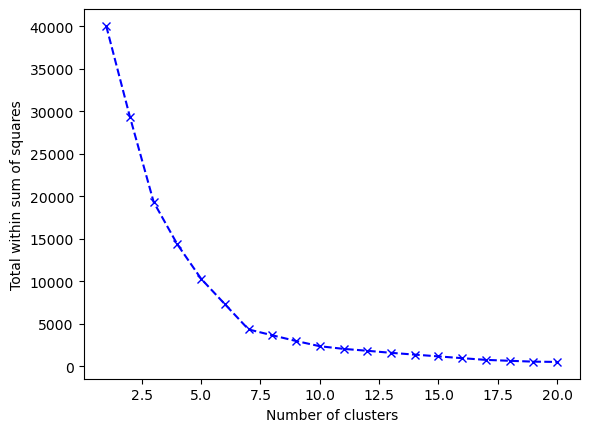

In [12]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(list(wss.keys()),list(wss.values()), 'bx--')
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

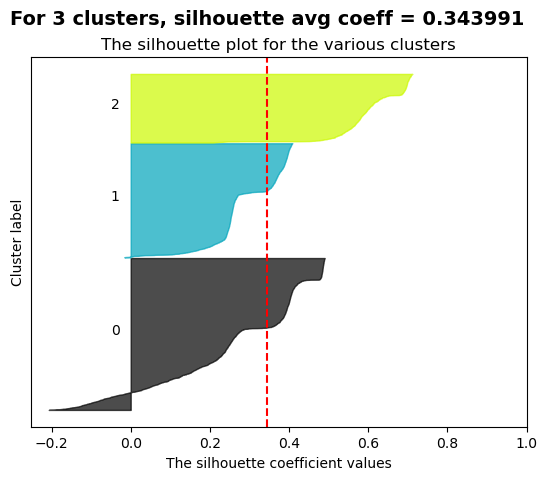

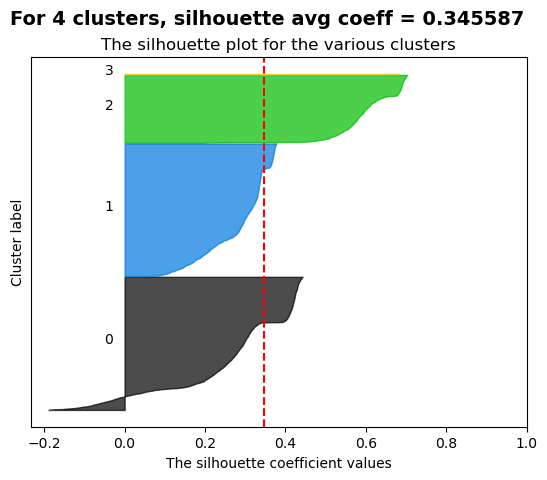

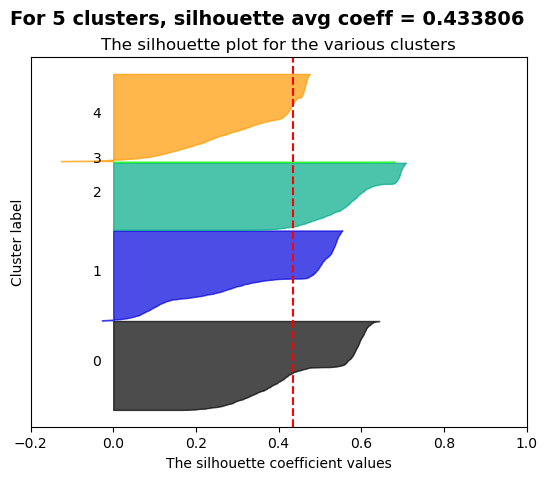

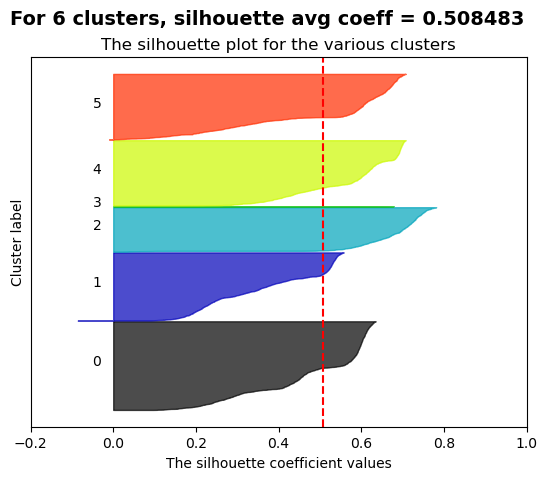

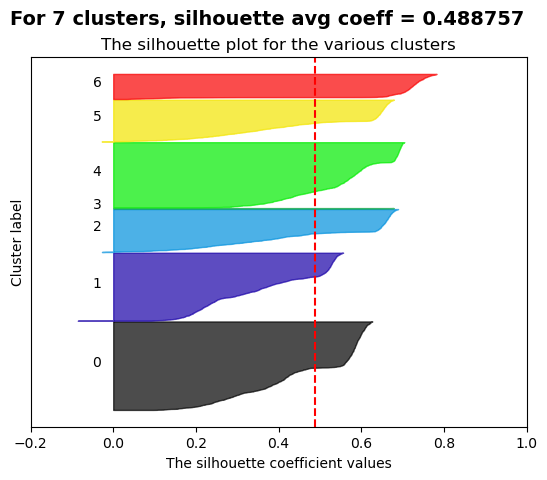

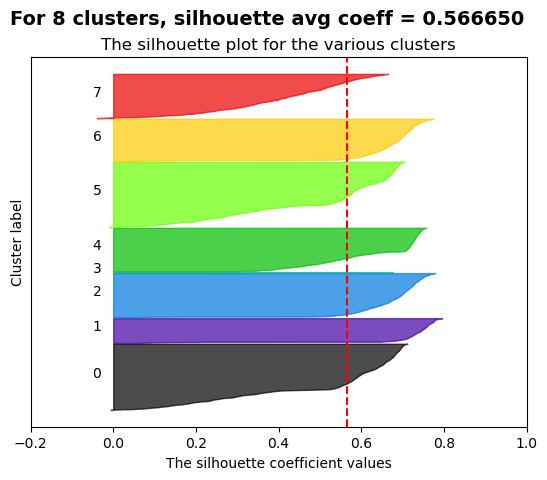

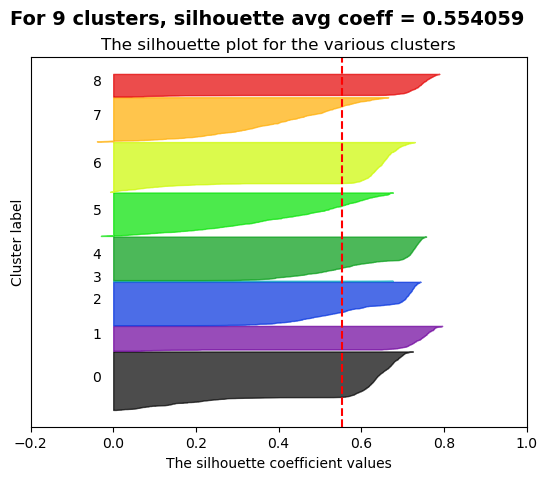

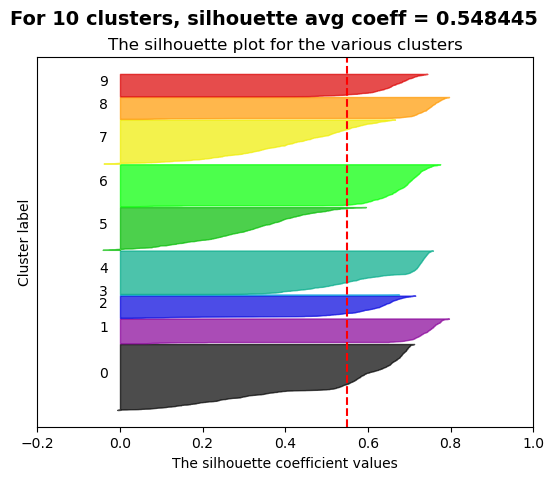

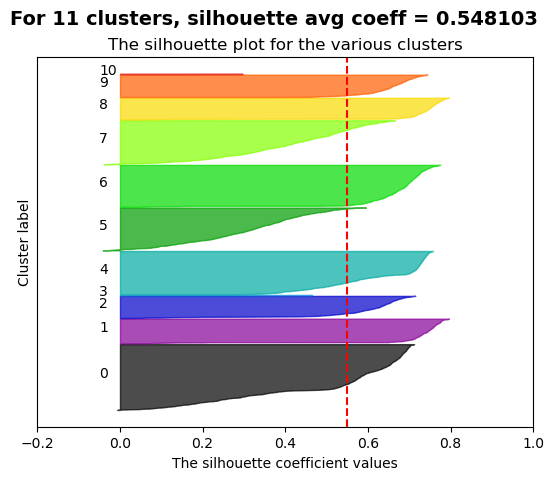

In [14]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### Just change this to your dataframe
X_matrix = users_std.values

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

In [15]:
best_kmeans = KMeans(n_clusters=8, random_state=1240)
best_kmeans.fit(users_std)
best_kmeans_labels = best_kmeans.predict(users_std)

best_kmeans_labels

array([6, 2, 2, ..., 3, 3, 3], dtype=int32)